# Data Cleaning
Not dealing with NaNs just yet

In [906]:
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
warnings.filterwarnings(action="ignore")

In [907]:
df = pd.read_csv("phl_exoplanet_catalog_2019.csv")

In [908]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


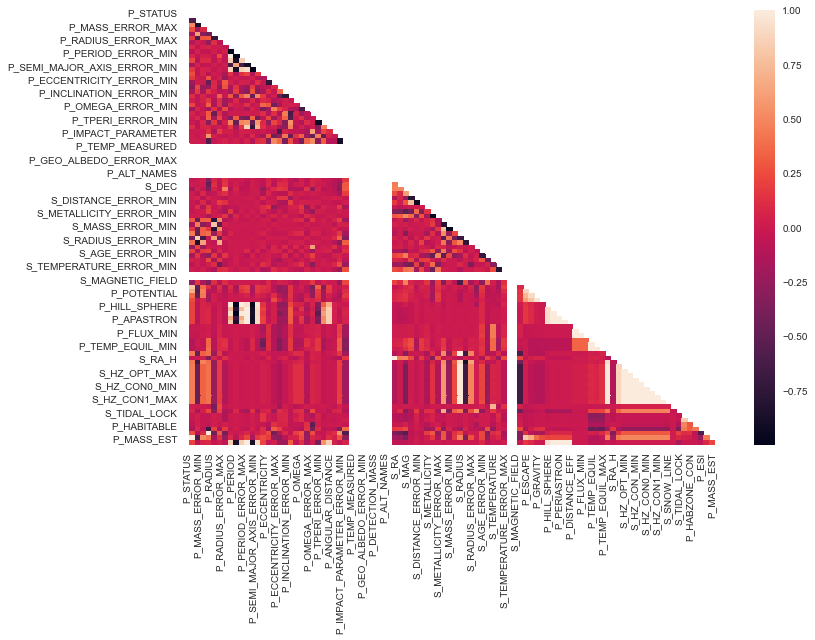

In [909]:
plt.figure(figsize=(12, 8))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask)
plt.show()

In [910]:
# removing irrelevant columns
df.drop(columns=["P_NAME", "P_STATUS", "P_YEAR", "P_UPDATED", "P_ALT_NAMES", "S_NAME", "S_ALT_NAMES", "S_CONSTELLATION", "S_CONSTELLATION_ABR", "S_CONSTELLATION_ENG", "S_TYPE_TEMP"], inplace=True)

# removing error columns
df.drop(columns=[i for i in list(df.columns) if i.endswith("ERROR_MIN")==True or i.endswith("ERROR_MAX")==True], inplace=True)

# removing columns with no or only 1 values
df.drop(columns=["P_TEMP_MEASURED", "P_GEO_ALBEDO", "P_DETECTION_MASS", "P_DETECTION_RADIUS", "P_ATMOSPHERE", "S_DISC", "S_MAGNETIC_FIELD"], inplace=True)

# removing columns to similar to the target var in order to combat multicollinearity
df.drop(columns=["P_ESI", "P_HABZONE_OPT", "P_HABZONE_CON", 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN','S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN','S_HZ_CON1_MAX', 'S_ABIO_ZONE', "P_MASS_EST", "P_RADIUS_EST", "P_HILL_SPHERE", "P_PERIASTRON", "P_SEMI_MAJOR_AXIS_EST", "P_SEMI_MAJOR_AXIS", "P_APASTRON", "P_DISTANCE_EFF", "S_RA_H", "S_RADIUS_EST", "S_SNOW_LINE", "S_LUMINOSITY", "P_POTENTIAL", "P_FLUX_MIN", "P_FLUX_MAX", "P_TEMP_EQUIL_MIN", "P_TEMP_EQUIL_MAX", "S_RA_H", "P_GRAVITY"], inplace=True)

# this row contains a negative number for star age
df.drop(4043, inplace=True)
df.drop(4044, inplace=True)
df.reset_index(drop=True, inplace=True)

In [911]:
# making our target variable binary:
df.P_HABITABLE = df.P_HABITABLE.map({2:1, 1:1, 0:0})

In [912]:
def Outliers(df):
    outliers_index = []
    for i in df.select_dtypes("number").columns:
        outliers_index += (df.loc[df[i] > (df[i].mean() + (df[i].std() * 4))].index.tolist())
        outliers_index += (df.loc[df[i] < (df[i].mean() - (df[i].std() * 4))].index.tolist())
    df.drop(index = outliers_index, inplace = True)
    return df

In [913]:
df = Outliers(df)

# DAE

## Adding a column for star similarity to our sun

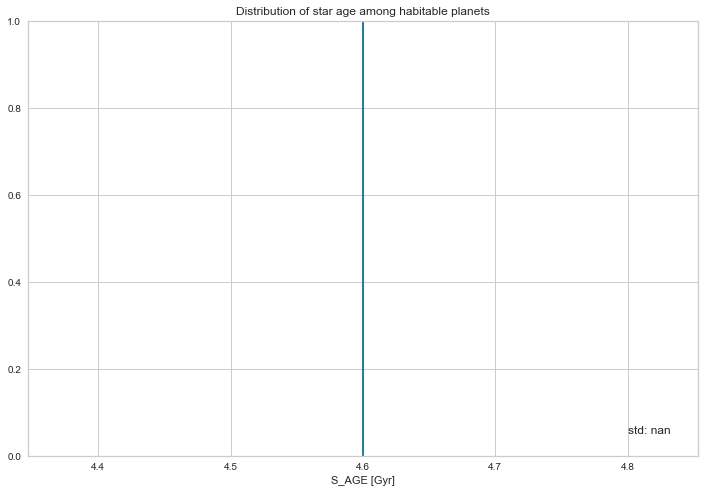

In [914]:
plt.figure(figsize=(12, 8))
plt.axvline(4.6, 0,1)
plt.text(4.8,0.05,f'std: {4.6/(df.loc[df.P_HABITABLE == 1].S_AGE.std()+df.loc[df.P_HABITABLE == 1].S_AGE.mean())}',rotation=0)
sns.kdeplot(data=df.loc[df.P_HABITABLE == 1], x="S_AGE")
plt.title("Distribution of star age among habitable planets")
plt.xlabel("S_AGE [Gyr]")
plt.show()

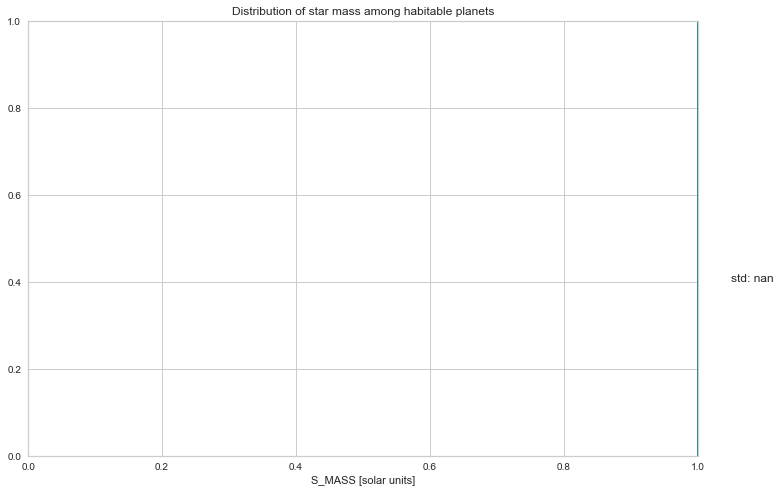

In [915]:
plt.figure(figsize=(12, 8))
plt.axvline(1, 0,1)
plt.text(1.05,0.4,f'std: {1/(df.loc[df.P_HABITABLE == 1].S_MASS.std()+df.loc[df.P_HABITABLE == 1].S_MASS.mean())}',rotation=0)
sns.kdeplot(data=df.loc[df.P_HABITABLE == 1], x="S_MASS")
plt.title("Distribution of star mass among habitable planets")
plt.xlabel("S_MASS [solar units]")
plt.show()

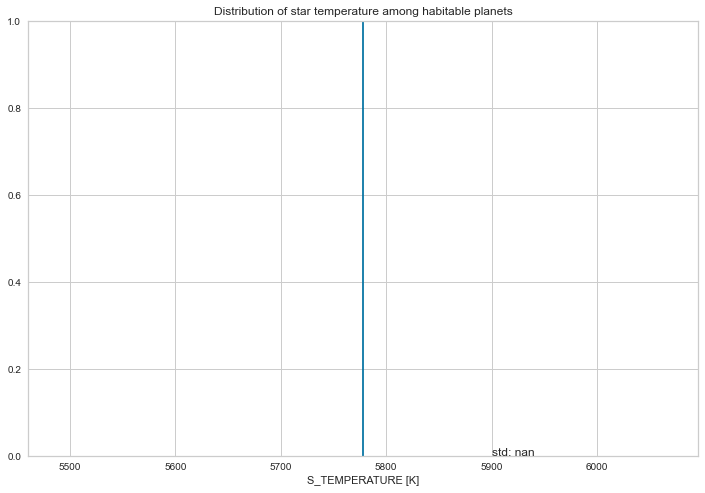

In [916]:
plt.figure(figsize=(12, 8))
plt.axvline(5778, 0,1)
plt.text(5900,0.0001,f'std: {5778/(df.loc[df.P_HABITABLE == 1].S_TEMPERATURE.std()+df.loc[df.P_HABITABLE == 1].S_TEMPERATURE.mean())}',rotation=0)
sns.kdeplot(data=df.loc[df.P_HABITABLE == 1], x="S_TEMPERATURE")
plt.title("Distribution of star temperature among habitable planets")
plt.xlabel("S_TEMPERATURE [K]")
plt.show()

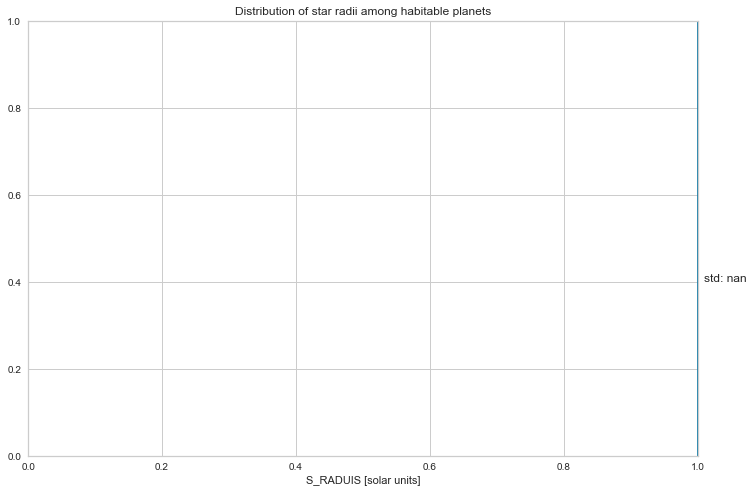

In [917]:
plt.figure(figsize=(12, 8))
plt.axvline(1, 0,1)
plt.text(1.01,0.4,f'std: {1/(df.loc[df.P_HABITABLE == 1].S_RADIUS.std()+df.loc[df.P_HABITABLE == 1].S_RADIUS.mean())}',rotation=0)
sns.kdeplot(data=df.loc[df.P_HABITABLE == 1], x="S_RADIUS")
plt.title("Distribution of star radii among habitable planets")
plt.xlabel("S_RADUIS [solar units]")
plt.show()

In [918]:
df["S_SSI"] = np.sqrt((df.S_RADIUS - 1)**2) + np.sqrt((df.S_MASS - 1)**2) + np.sqrt((df.S_AGE - 4.6)**2) + np.sqrt((df.S_TEMPERATURE - 5778)**2)

# EDA

## PCA
In order to see if the habitable planets follow a certain distinct behaviour compared to the other data points

In [919]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [920]:
scaler = StandardScaler()
pca = PCA()

In [921]:
df_scale = scaler.fit_transform(df.drop(columns=list(df.select_dtypes("object").columns)).fillna(df.select_dtypes("number").mean()))

In [922]:
pca.fit_transform(df_scale)
print(pca.explained_variance_ratio_)

[1.47113175e-01 1.13189328e-01 8.67531706e-02 7.94846612e-02
 5.85980189e-02 5.42420638e-02 4.57436329e-02 4.43877652e-02
 3.96937960e-02 3.68694776e-02 3.50651234e-02 3.45315833e-02
 3.16438088e-02 2.92862032e-02 2.76007076e-02 2.38309958e-02
 2.29466519e-02 1.99031540e-02 1.75777309e-02 1.34889753e-02
 1.24084031e-02 8.02429265e-03 5.89903833e-03 5.06534689e-03
 4.46950098e-03 2.18339477e-03 6.62984092e-34]


In [923]:
pc1=[]
pc2=[]
pc3=[]
for i in list(pca.fit_transform(df_scale)):
    pc1.append(i[0])
    pc2.append(i[1])
    pc3.append(i[1])

In [924]:
df["pc1"]=pc1
df["pc2"]=pc2
df["pc3"]=pc3

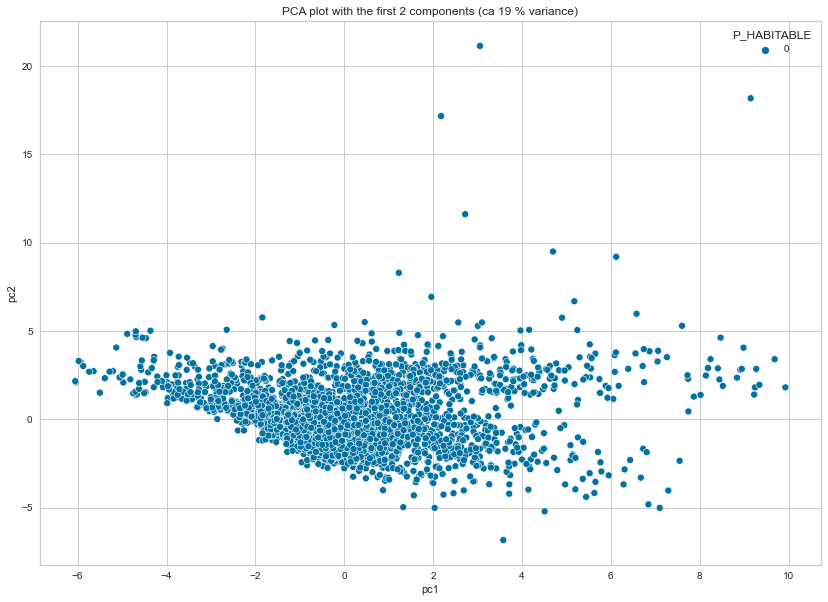

In [925]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="pc1", y="pc2", hue="P_HABITABLE")
plt.title("PCA plot with the first 2 components (ca 19 % variance)")
plt.show()

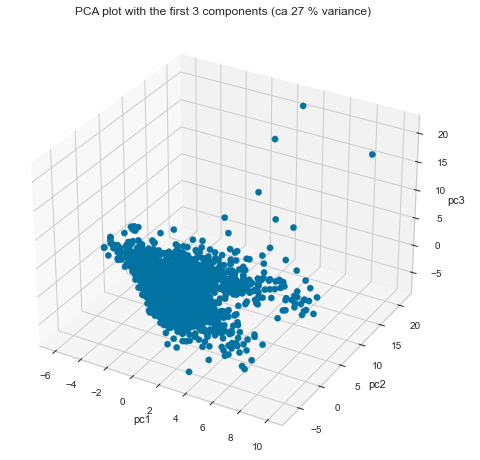

In [926]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df.pc1, df.pc2, df.pc3, s=40, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
ax.set_title("PCA plot with the first 3 components (ca 27 % variance)")

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [927]:
df.drop(columns=["pc1", "pc2", "pc3"], inplace=True)

## Clusters

In order to see if unsupervised ML would pick up the habitable planets

In [928]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [929]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_scale)

#ac = AgglomerativeClustering(n_clusters = 2)
#ac.fit(df_scale)

KMeans(n_clusters=2)

In [930]:
df["clusters"] = kmeans.labels_

In [931]:
df.clusters.value_counts()

1    2795
0    1011
Name: clusters, dtype: int64

In [932]:
df.loc[df.clusters == 1].P_HABITABLE

14      0
42      0
52      0
53      0
54      0
       ..
3997    0
3999    0
4005    0
4006    0
4007    0
Name: P_HABITABLE, Length: 2795, dtype: int64

In [933]:
df.drop(columns=["clusters"], inplace=True)

## Trying to identify characteristics of hab planets

In [934]:
hab_means=list(df.loc[df.P_HABITABLE==1].describe().loc["mean"])

In [935]:
unhab_means = list(df.loc[df.P_HABITABLE==0].describe().loc["mean"])

In [936]:
column_ind=[]
for i in range(len(hab_means)):
    try:
        if hab_means[i]/unhab_means[i] < 0.01 or hab_means[i]/unhab_means[i] > 1.99:
            column_ind.append(i)
    except:
        continue

In [937]:
column_of_note=[]

for i in column_ind:
    column_of_note.append(list(df.select_dtypes("number"))[i])
column_of_note

[]

In [938]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = pd.DataFrame(scaler.fit_transform(df.select_dtypes("number")), columns=list(df.select_dtypes("number").columns))

In [939]:
for i in column_of_note:
    plt.figure(figsize=(12, 8))
    a=sns.kdeplot(data=df.loc[df.P_HABITABLE == 1], y=i, x=new_df.loc[df.P_HABITABLE == 1].reset_index().index, shade=True)
    a.set(xticks=[])
    plt.title(f"Distribution of {i} among habitable planets [earth/solar units]")
    plt.show()

In [940]:
import random
for i in column_of_note:
    plt.figure(figsize=(12, 8))
    a=sns.kdeplot(data=df.loc[df.P_HABITABLE == 1], y=i, x=new_df.loc[df.P_HABITABLE == 1].reset_index().index, shade=True,  label="hab")
    b=sns.kdeplot(data=df.loc[df.P_HABITABLE == 0].reset_index().loc[random.sample(range(0, len(df.loc[df.P_HABITABLE == 1])), len(df.loc[df.P_HABITABLE == 1]))], y=i, x=new_df.loc[df.P_HABITABLE == 0].reset_index().loc[random.sample(range(0, len(df.loc[df.P_HABITABLE == 1])), len(df.loc[df.P_HABITABLE == 1]))].reset_index().index, label="inhab")
    a.set(xticks=[])
    b.set(xticks=[])
    plt.title(f"Distribution of {i} among habitable planets vs inhabitable planets [earth/solar units]")
    plt.legend()
    plt.show()

# Target var: P_HABITABLE

## X & y

In [941]:
X = df.drop(columns = ["P_HABITABLE"])
y = df.P_HABITABLE

In [942]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Preprocessing with dummies

In [943]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [944]:
num_trans = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())
cat_trans = make_pipeline(SimpleImputer(strategy = "constant", fill_value="missing"), OneHotEncoder(handle_unknown = "ignore"))

In [945]:
num_cols = X.select_dtypes("number").columns
cat_cols = X.select_dtypes("object").columns

In [946]:
from sklearn.compose import make_column_transformer
preprocessor = make_column_transformer((num_trans, num_cols), (cat_trans, cat_cols))
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

## Model selector with scoring

In [947]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

In [948]:
classifiers=[RandomForestClassifier(), SVC(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), RidgeClassifier()]

In [949]:
kappa_scorer = make_scorer(cohen_kappa_score)
scorings = ["accuracy", "f1", "precision", "recall", kappa_scorer]

In [950]:
for i in classifiers:
    x=0
    for j in scorings:
        grid = GridSearchCV(i, cv=10, scoring = j, param_grid={})

        try:
            grid.fit(X_train, y_train)
        except:
            grid.fit(X_train.toarray(), y_train)

        print(i, grid.best_score_, j)
        x+=1
        if x==5:
            print("")

RandomForestClassifier() 1.0 accuracy
RandomForestClassifier() 0.0 f1
RandomForestClassifier() 0.0 precision
RandomForestClassifier() 0.0 recall
RandomForestClassifier() nan make_scorer(cohen_kappa_score)



ValueError: The number of classes has to be greater than one; got 1 class

## Grid search with LogisticRegression and kappa_scorer

In [ ]:
param_grid = [{"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"], "penalty":["none", "l1", "l2", "elasticnet"], "C":[100, 10, 1.0, 0.1, 0.01]}]
grid = GridSearchCV(LogisticRegression(), cv=10, scoring = kappa_scorer, param_grid=param_grid)

grid.fit(X_train, y_train)

print(kappa_scorer(grid, X_train, y_train))

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_train, grid.predict(X_train)), annot=True, fmt="d", cmap="cividis", cbar=False)
plt.xticks([0, 1], ['Negative', 'Positive'], ha="left")
plt.yticks([0, 1], ["Negative", 'Positive'], ha="left")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.title("Confusion matrix on training data")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, grid.predict(X_test)), annot=True, fmt="d", cmap="cividis", cbar=False)
plt.xticks([0, 1], ['Negative', 'Positive'], ha="left")
plt.yticks([0, 1], ["Negative", 'Positive'], ha="left")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.title("Confusion matrix on test data")
plt.show()

# Target var: P_HABITABLE with only star data

## X & y

In [ ]:
X = df.drop(columns = [i for i in list(df.columns) if i.startswith("P")==True])
y = df.P_HABITABLE

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Preprocessing with dummies

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_trans = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())
cat_trans = make_pipeline(SimpleImputer(strategy = "constant", fill_value="missing"), OneHotEncoder(handle_unknown = "ignore"))

In [ ]:
num_cols = X.select_dtypes("number").columns
cat_cols = X.select_dtypes("object").columns

In [ ]:
from sklearn.compose import make_column_transformer
preprocessor = make_column_transformer((num_trans, num_cols), (cat_trans, cat_cols))
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

## Model selector with scoring

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

In [ ]:
classifiers=[RandomForestClassifier(), SVC(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), RidgeClassifier()]

In [ ]:
kappa_scorer = make_scorer(cohen_kappa_score)
scorings = ["accuracy", "f1", "precision", "recall", kappa_scorer]

In [ ]:
for i in classifiers:
    x=0
    for j in scorings:
        grid = GridSearchCV(i, cv=10, scoring = j, param_grid={})

        try:
            grid.fit(X_train, y_train)
        except:
            grid.fit(X_train.toarray(), y_train)

        print(i, grid.best_score_, j)
        x+=1
        if x==5:
            print("")

## Grid search with random forest. Scorer: accuracy, precision and kappa

In [ ]:
for i in ["accuracy", "precision", kappa_scorer]:
    # Number of trees in random forest
    n_estimators = [50, 100, 200, 500]
    # Number of features to consider at every split
    #max_features = ['auto', 'sqrt']
    # Method of selecting samples for training each tree
    #bootstrap = [True, False]
    # Create the random grid
    #,'max_features': max_features,'bootstrap': bootstrap
    random_grid = {'n_estimators': n_estimators}
    grid = GridSearchCV(RandomForestClassifier(), cv=10, scoring = i, param_grid=random_grid)

    grid.fit(X_train, y_train)

    print(accuracy_score(y_train, grid.predict(X_train)))
    print(precision_score(y_train, grid.predict(X_train)))
    print(kappa_scorer(grid, X_train, y_train)) 
    plt.figure(figsize=(12, 8))
    sns.heatmap(confusion_matrix(y_train, grid.predict(X_train)), annot=True, fmt="d", cmap="cividis", cbar=False)
    plt.xticks([0, 1], ['Negative', 'Positive'], ha="left")
    plt.yticks([0, 1], ["Negative", 'Positive'], ha="left")
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.title("Confusion matrix on training data")
    plt.show()
    
    print(accuracy_score(y_test, grid.predict(X_test)))
    print(precision_score(y_test, grid.predict(X_test)))
    print(kappa_scorer(grid, X_test, y_test)) 
    plt.figure(figsize=(12, 8))
    sns.heatmap(confusion_matrix(y_test, grid.predict(X_test)), annot=True, fmt="d", cmap="cividis", cbar=False)
    plt.xticks([0, 1], ['Negative', 'Positive'], ha="left")
    plt.yticks([0, 1], ["Negative", 'Positive'], ha="left")
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.title("Confusion matrix on test data")
    plt.show()